# 目的
- pymc3での分布の確認

In [1]:
import sys, os
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import ChocoUtils as util

%matplotlib inline
import matplotlib.pyplot as plt

# seaborneスタイルセット
import seaborn as sns
sns.set()
sns.set_style('darkgrid') # プリセットのスタイル
sns.set_context("paper")  # スケール

## ベータ分布

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [theta]
100%|██████████| 1500/1500 [00:01<00:00, 1204.64it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [theta]
100%|██████████| 1500/1500 [00:00<00:00, 1644.45it/s]
The acceptance probability does not match the target. It is 0.887635571444669, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [theta]
100%|██████████| 1500/1500 [00:00<00:00, 1918.92it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks
Auto-assigning NUTS sampler...
Initializing N

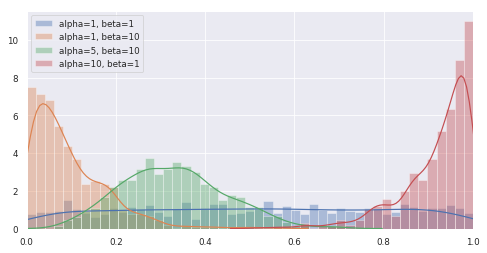

In [2]:
def check_beta_dist(params):
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(1, 1, 1)
    bs = np.linspace(0.0, 1.0, 50)
    for (a, b) in params:
        with pm.Model() as m:
            theta = pm.Beta('theta', alpha=a, beta=b)
            trace = pm.sample(1000, chains=1)
        sns.distplot(trace['theta'], ax=ax, bins=bs, label='alpha={}, beta={}'.format(a, b))
    ax.legend()
    ax.set_xlim([0.0, 1.0])
check_beta_dist(params=[(1,1), (1, 10), (5, 10), (10, 1)])